In [1]:
import pandas as pd

data = pd.read_csv("../datasets/market_insights_overview_all.csv")
data["date"] = pd.to_datetime(data["date"])
# data = pd.read_csv("../datasets/market_insights_overview_5p.csv")



In [2]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34033079 entries, 0 to 34033078
Data columns (total 9 columns):
 #   Column           Dtype         
---  ------           -----         
 0   id               int64         
 1   product_id       int64         
 2   manufacturer_id  int64         
 3   cat_id           int64         
 4   root_cat_id      int64         
 5   date             datetime64[ns]
 6   hits             int64         
 7   clicks           int64         
 8   last_modified    object        
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 2.3+ GB


In [3]:
categories = pd.read_csv("../datasets/solr_categories_all_16_09_2021.csv")
categories.head()

,parent,title_no,internal_doc_type,image_url,description,title,title_phonetic,url,tags,path,...,internal_doc_id,popularity,root,alias,title_edge_ngram,id,alias_no,adult,last_modified,parents
0,Sofa,2-seter sofa,category,/3135/3135859/jot_1603574-03_Fs.154x75!m.png,181 produkter,2-seter sofa,2-seter sofa,/kategorier/2-seter-sofa,filter,Hjem og husholdning>Møbler>Sofa>2-seter sofa,...,13084,1192,Hjem og husholdning,NaN,2-seter sofa,13084,NaN,False,2021-09-16T03:02:23.579Z,"Hjem og husholdning,Møbler,Sofa"
1,Sofa,3-seter sofa,category,/3135/3135481/jot_1514401-01_Fs.168x75!m.png,181 produkter,3-seter sofa,3-seter sofa,/kategorier/3-seter-sofa,filter,Hjem og husholdning>Møbler>Sofa>3-seter sofa,...,13085,1192,Hjem og husholdning,NaN,3-seter sofa,13085,NaN,False,2021-09-16T03:02:23.579Z,"Hjem og husholdning,Møbler,Sofa"
2,Foto og video,360-kamera,category,/2529/2529818/original.98x75!m.jpg,19 produkter,360-kamera,360-kamera,/kategorier/360-kamera,products,Foto og video>360-kamera,...,11874,1406,Foto og video,"360-graderskamera,vr-kamera",360-kamera,11874,"360-graderskamera,vr-kamera",False,2021-09-16T03:02:23.579Z,Foto og video
3,TV og hjemmekino,3D-briller,category,/1335/1335677/3d-briller.148x75!m.jpg,6 produkter,3D-briller,3D-briller,/kategorier/3d-briller,products,Lyd og bilde>TV og hjemmekino>3D-briller,...,11030,1007,Lyd og bilde,NaN,3D-briller,11030,NaN,False,2021-09-16T03:02:23.579Z,"Lyd og bilde,TV og hjemmekino"
4,"Skriver, skanner og tilbehør",3D-printer,category,/1194/1194469/bfb-3dtouch-smoke-3d-printer_0.6...,57 produkter,3D-printer,3D-printer,/kategorier/3d-printer,products,"Data>Skriver, skanner og tilbehør>3D-printer",...,11091,1729,Data,"3d printere,3d-skriver,printer,skriver,skrivere",3D-printer,11091,"3d printere,printer,skriver,skrivere,3d-skriver",False,2021-09-16T03:02:23.579Z,"Data,Skriver\, skanner og tilbehør"


In [5]:
# Join market_insight table with category names
category_names = categories[[ "internal_doc_id", "title"]]

data_joined = pd.merge(data, category_names, how="left", left_on=["cat_id"], right_on=["internal_doc_id"])
data_joined = data_joined.rename(columns={"title": "cat_name"})
data_joined.head()

,id,product_id,manufacturer_id,cat_id,root_cat_id,date,hits,clicks,last_modified,internal_doc_id,cat_name
0,12871556,343773,21,51,128,2019-09-16,492,162,2019-09-17 05:05:46.261642,51,Hodetelefoner og ørepropper
1,12871557,354639,564,11054,11750,2019-09-16,443,9,2019-09-17 05:05:46.261642,11054,Varmepumpe
2,12871558,321019,6522,11458,11750,2019-09-16,396,107,2019-09-17 05:05:46.261642,11458,Robotstøvsuger
3,12871559,363342,21,19,117,2019-09-16,312,50,2019-09-17 05:05:46.261642,19,Mobiltelefon
4,12871560,316344,168,19,117,2019-09-16,293,53,2019-09-17 05:05:46.261642,19,Mobiltelefon


In [13]:
print(category_names["title"])
categories_file = open("categories.txt", "w")
for cat_line in category_names["title"]:
    categories_file.write(cat_line)
    categories_file.write("\n")
categories_file.close()

0           2-seter sofa
1           3-seter sofa
2             360-kamera
3             3D-briller
4             3D-printer
              ...       
2123     Øyenbrynsprimer
2124    Øyenbrynstrimmer
2125          Øyenskygge
2126      Øyenskyggekost
2127                Øyne
Name: title, Length: 2128, dtype: object


In [6]:
import matplotlib.pyplot as plt
import numpy as np
# Set pandas to use decimal insteaf of scientific e^x notaion
pd.set_option("display.float_format", lambda x: "%.0f" % x)

interesting_data = data_joined[["date", "hits", "clicks", "product_id", "cat_id", "cat_name" ]]

print(f"Unique products: {data['product_id'].nunique()}")
print(f"Unique categories: {data['cat_id'].nunique()}")


grouped = interesting_data.groupby(["cat_id", "date"], as_index=False).sum()

# Filter away early 2018 data as it seems to contain errors
grouped = grouped.loc[grouped['date'] > '2018-12-01']

print(grouped)
grouped.describe()

Unique products: 302636
Unique categories: 1320
         cat_id       date  hits  clicks  product_id
120           2 2018-12-02  2450     301   293349707
121           2 2018-12-03  2889     418   324468137
122           2 2018-12-04  3048     413   319458697
123           2 2018-12-05  2777     381   305158187
124           2 2018-12-06  2882     363   292147192
...         ...        ...   ...     ...         ...
1011335   13759 2021-09-15     3       0      987105
1011336   13764 2021-09-10    20      30    11260516
1011337   13764 2021-09-12     7       4     2094121
1011338   13764 2021-09-13     7       2     2489036
1011339   13764 2021-09-15     7       0     3141188

[939383 rows x 5 columns]


,cat_id,hits,clicks,product_id
count,939383,939383,939383,939383
mean,10404,131,33,11505893
std,3880,427,132,24523177
min,2,0,0,8791
25%,11201,9,2,1894146
50%,11645,30,7,4721243
75%,12071,97,24,11235958
max,13764,60601,53187,1514347598


I perioden august 2018 til perioden august 2021 ble det registrert 1320 unike kategorier.
Et nevralnett med 1320 i bredde er litt stort kanskje? Det vil også låse modellen til X antall kategorier.
Dette er et argument for å se på hver kategori inviduelt og ha en egen modell per kategori.

Ulempen med det igjen er at det blir veldig mange modeller...

cat_id        38518
date          38518
hits          38518
clicks        38518
product_id    38518
dtype: int64


array([[<AxesSubplot:title={'center':'hits'}>,
        <AxesSubplot:title={'center':'clicks'}>]], dtype=object)

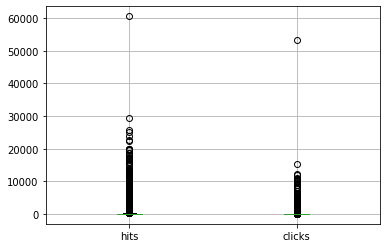

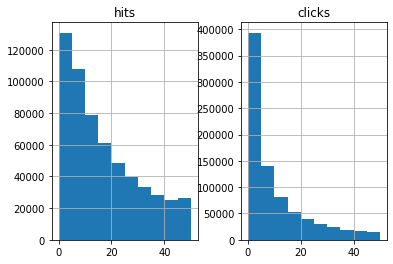

In [7]:
print(grouped[grouped["hits"] == 1].count())
grouped.boxplot(column=["hits", "clicks"])
grouped.hist(column=["hits", "clicks"], range=(0, 50))

Vi ser at antall klikk for en kategori per dag avtar hurtig! Kan den følge en kjent sannsynlighet distribusjon?
F.eks: pareto distribution?

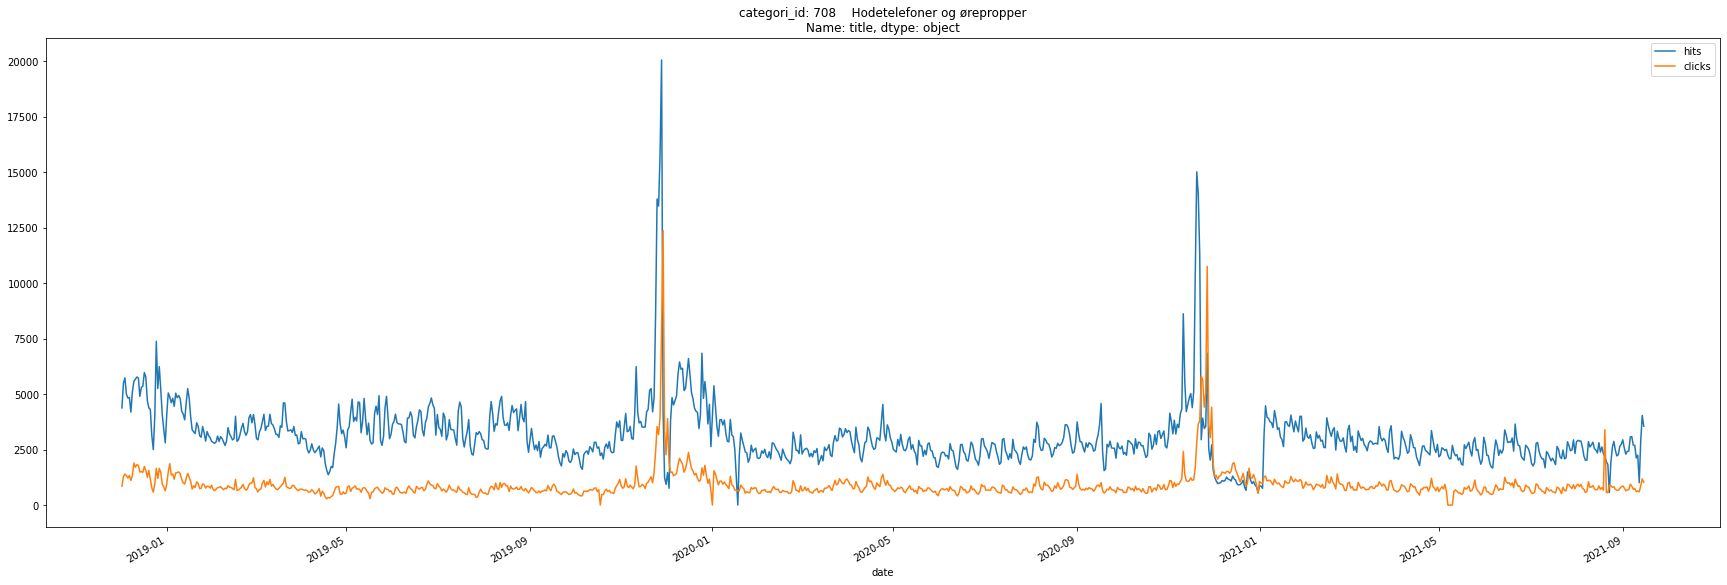

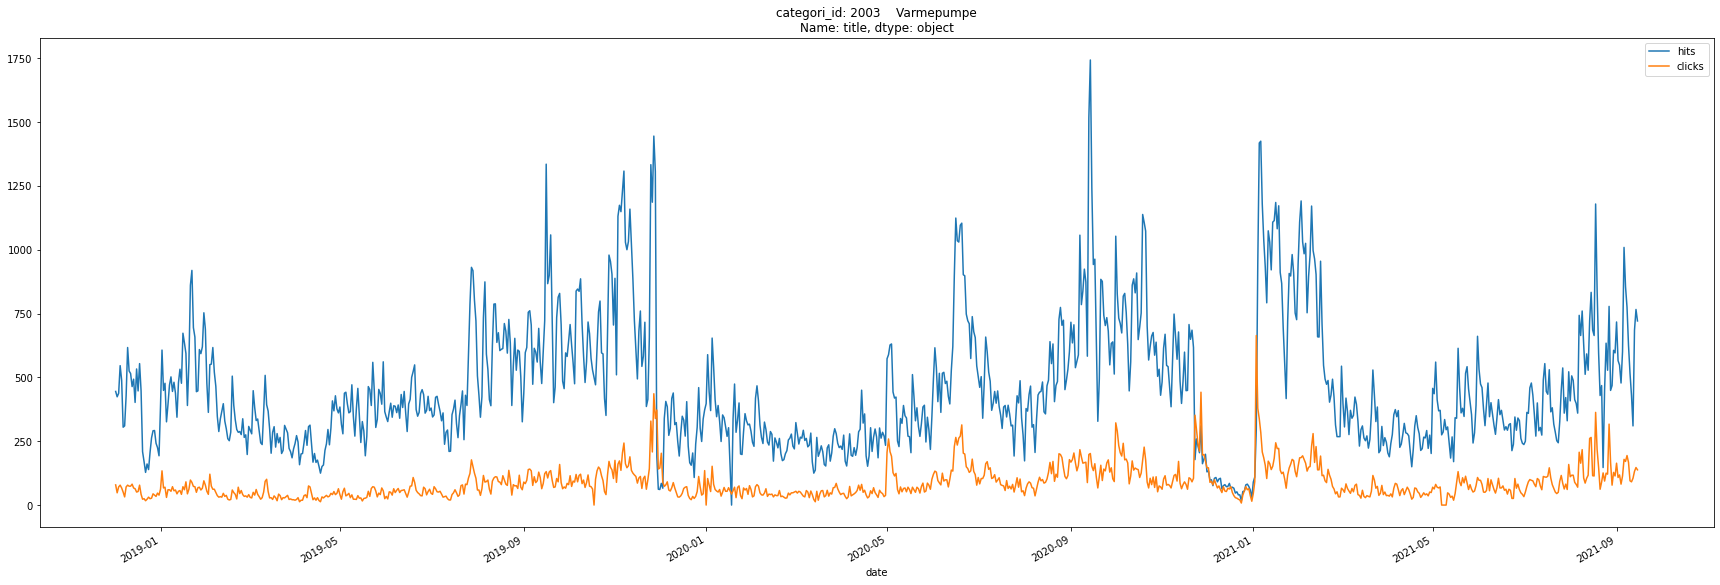

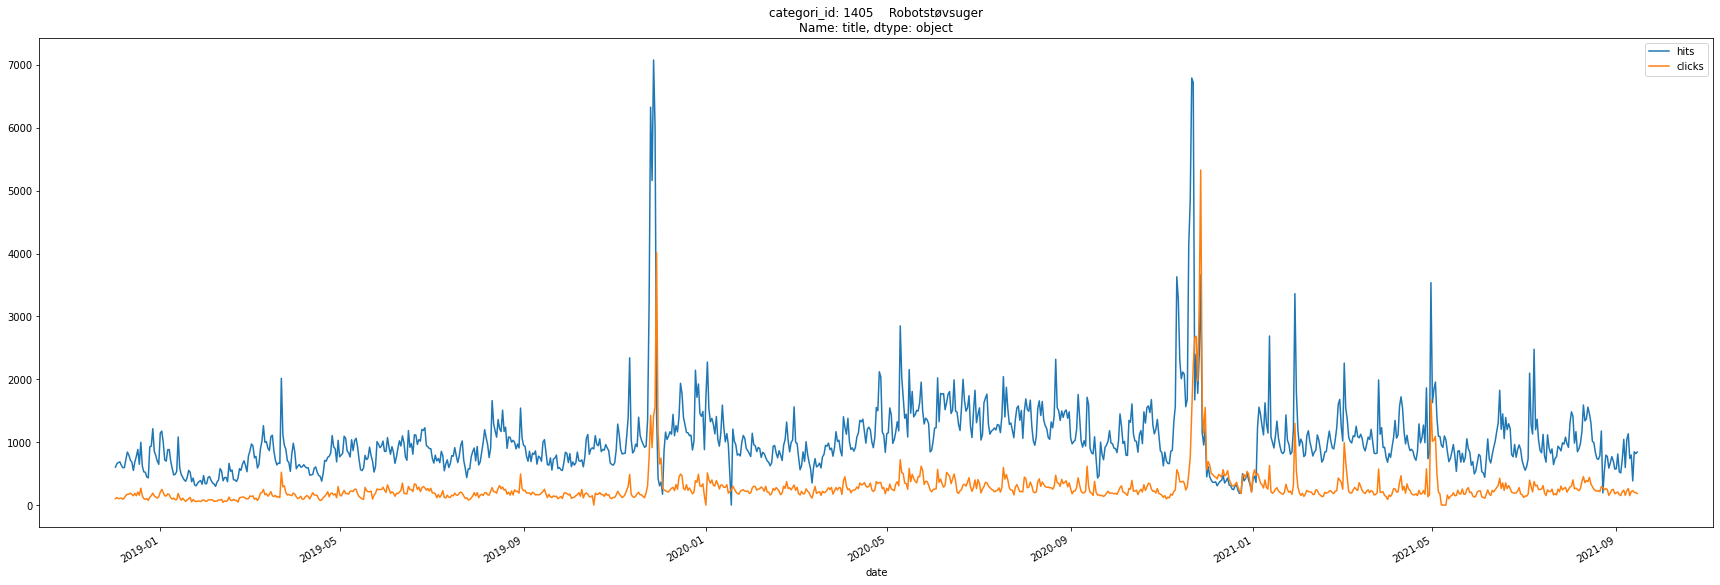

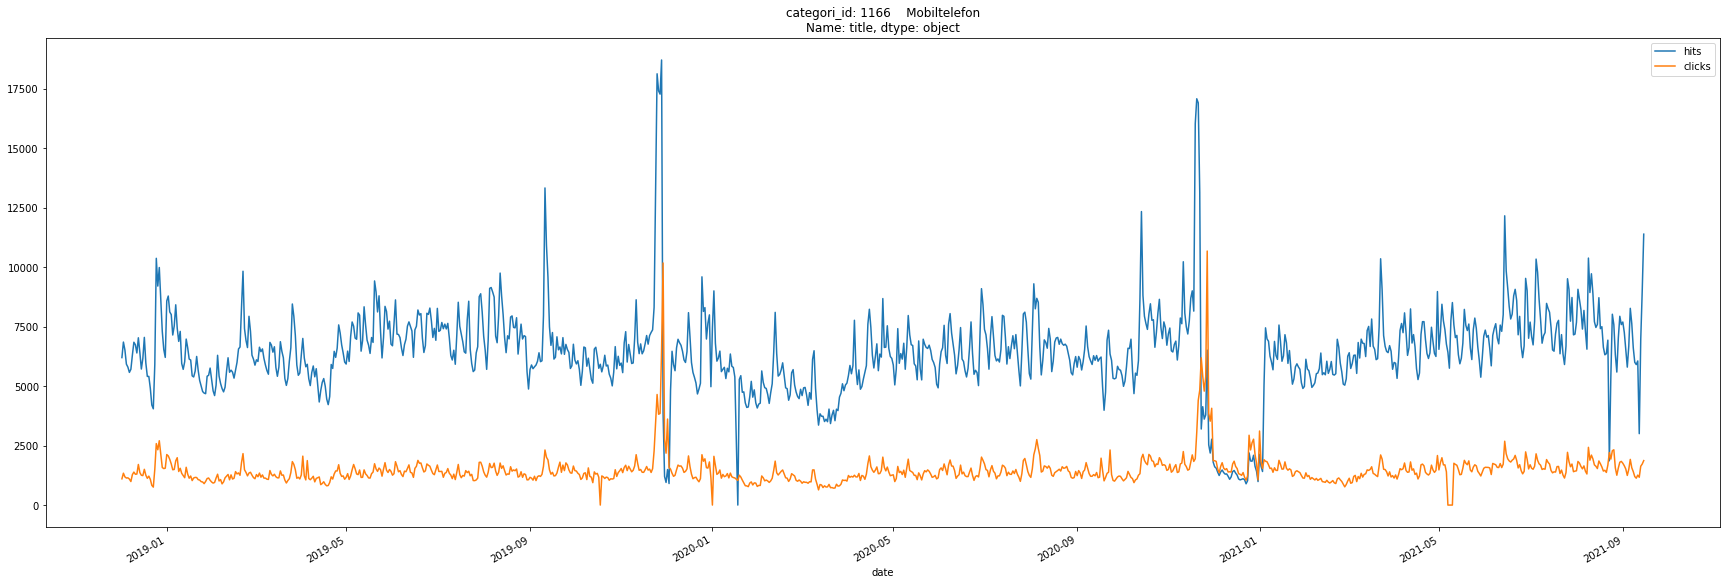

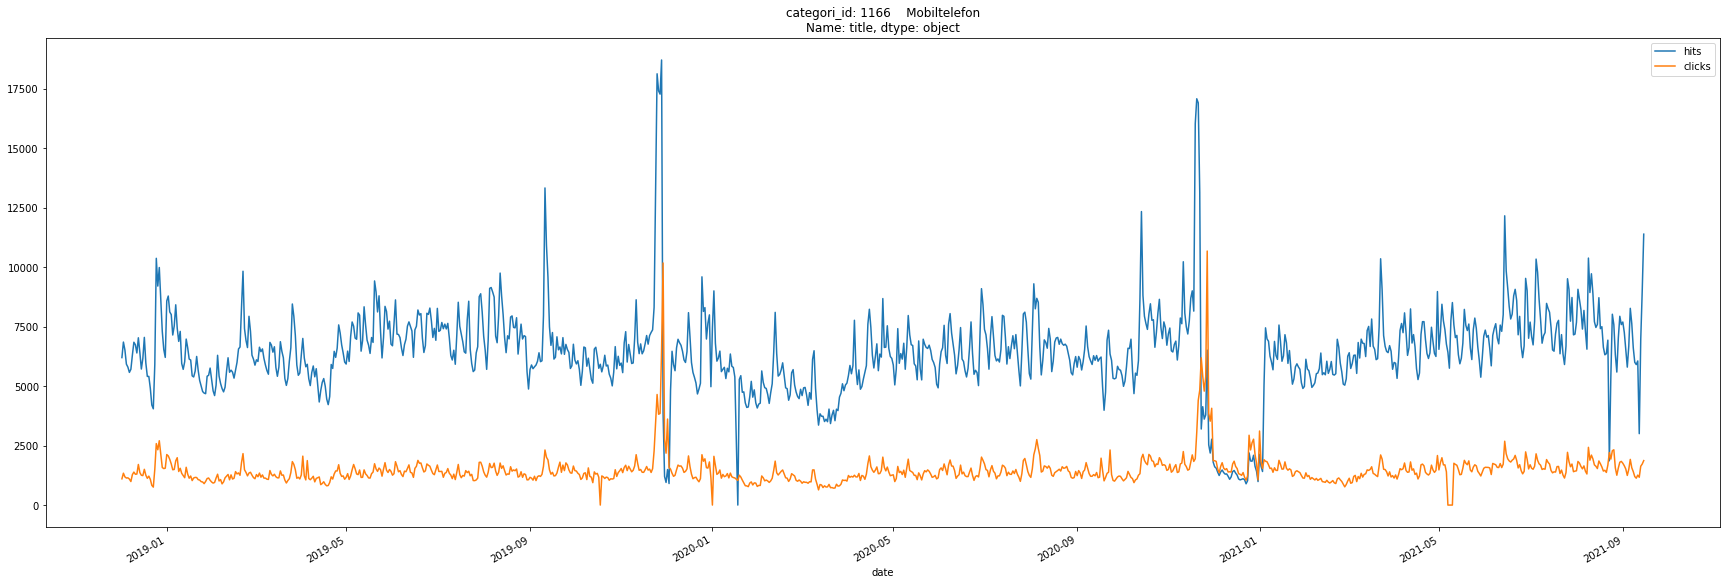

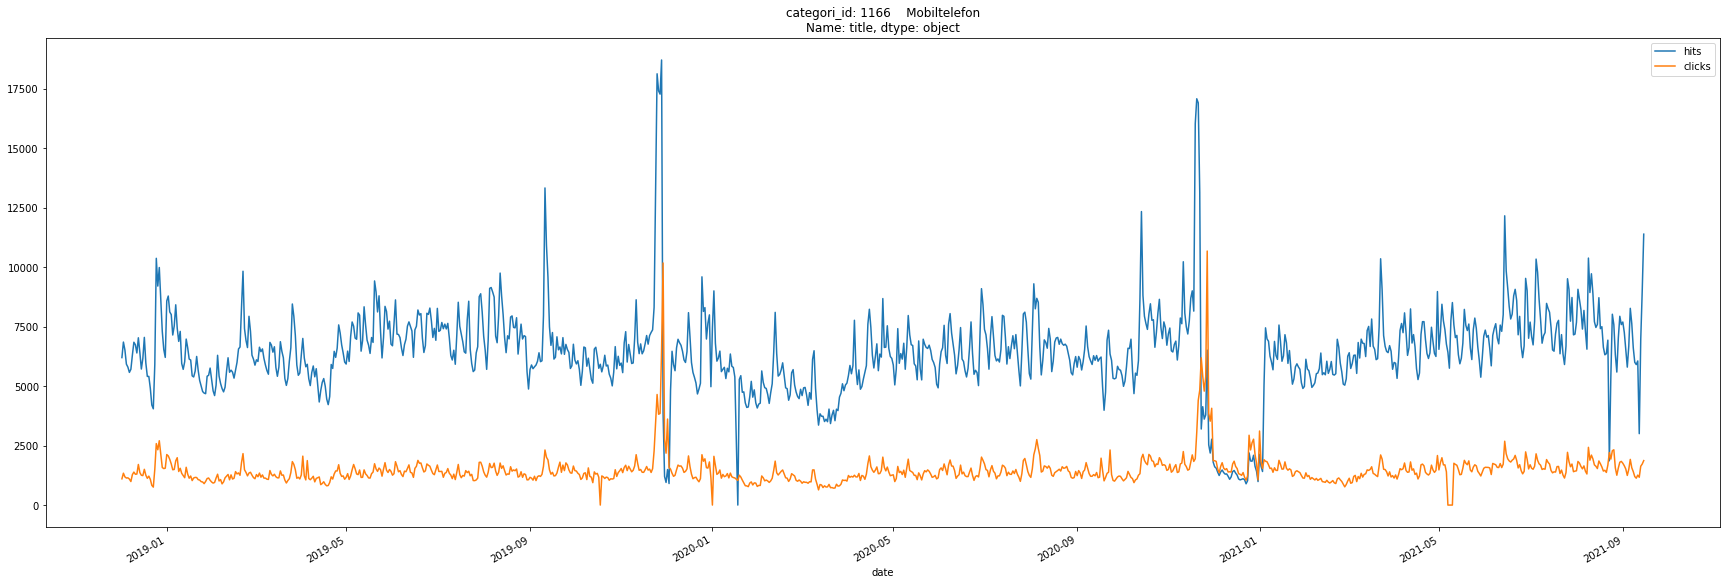

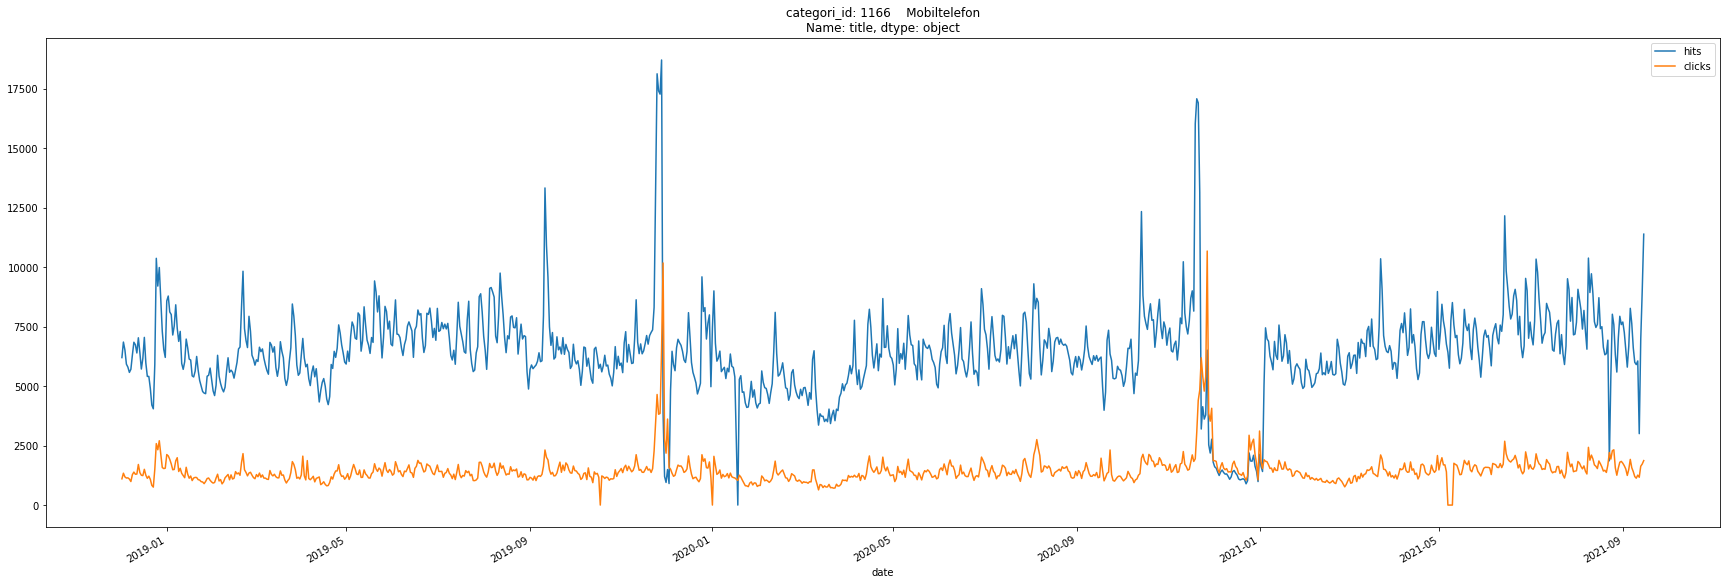

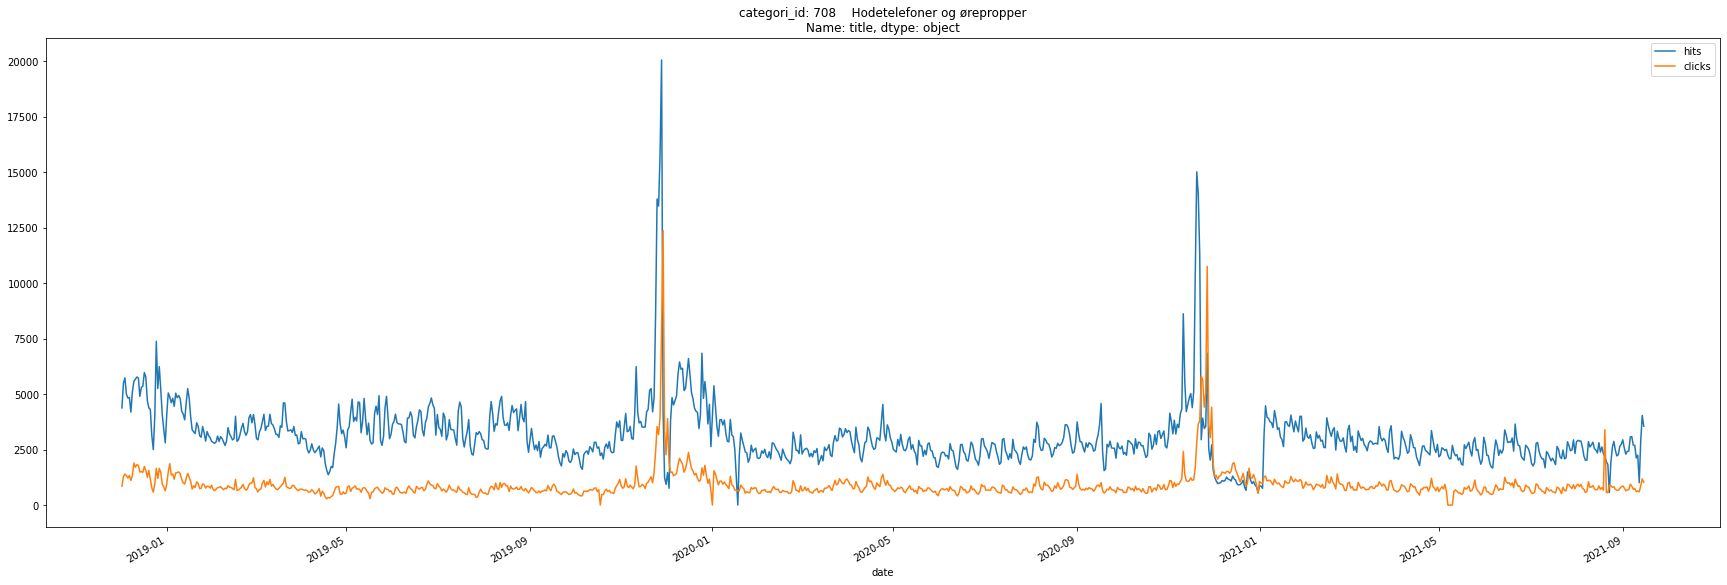

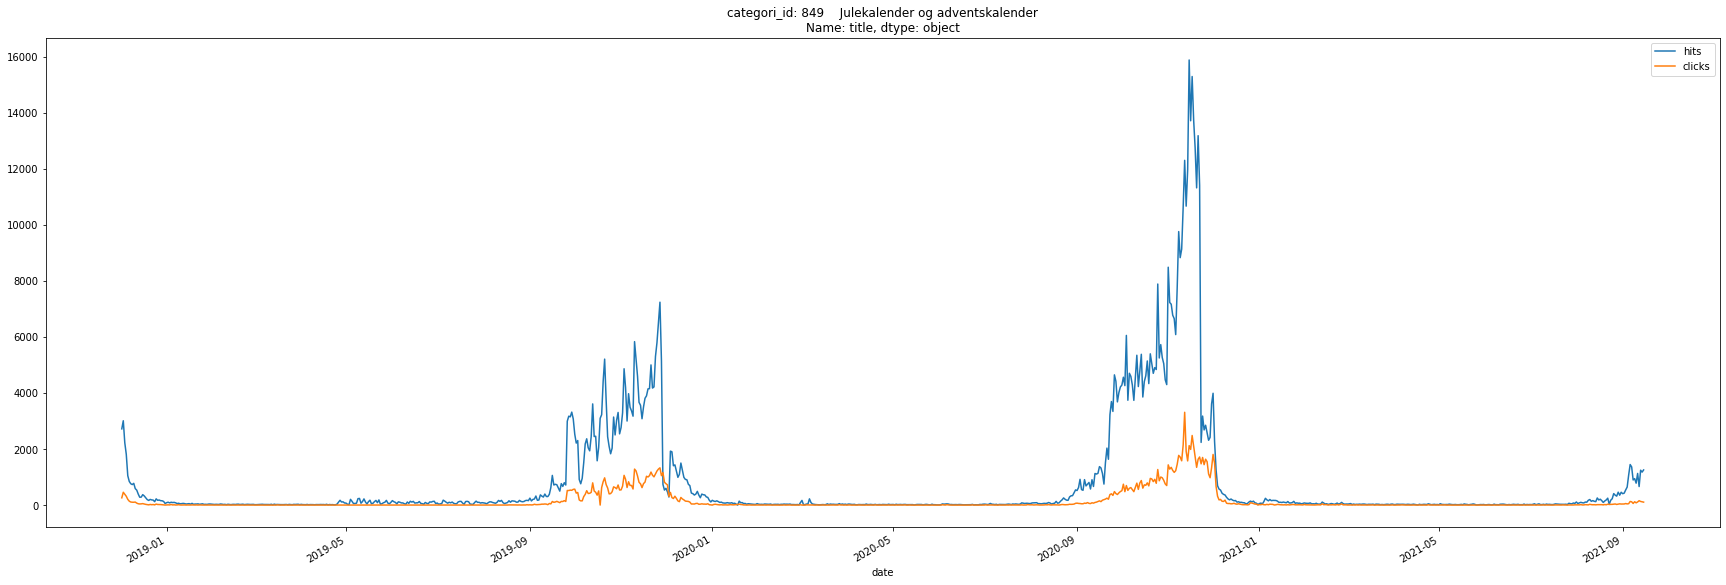

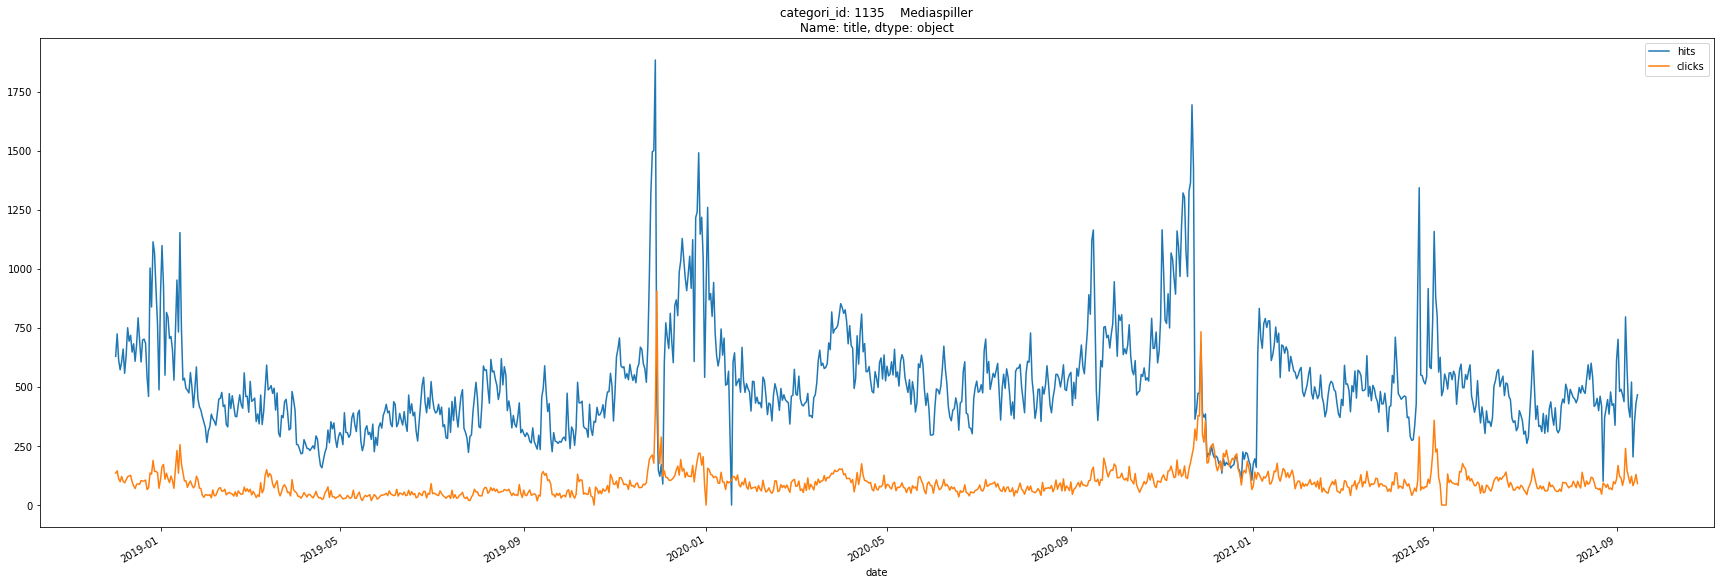

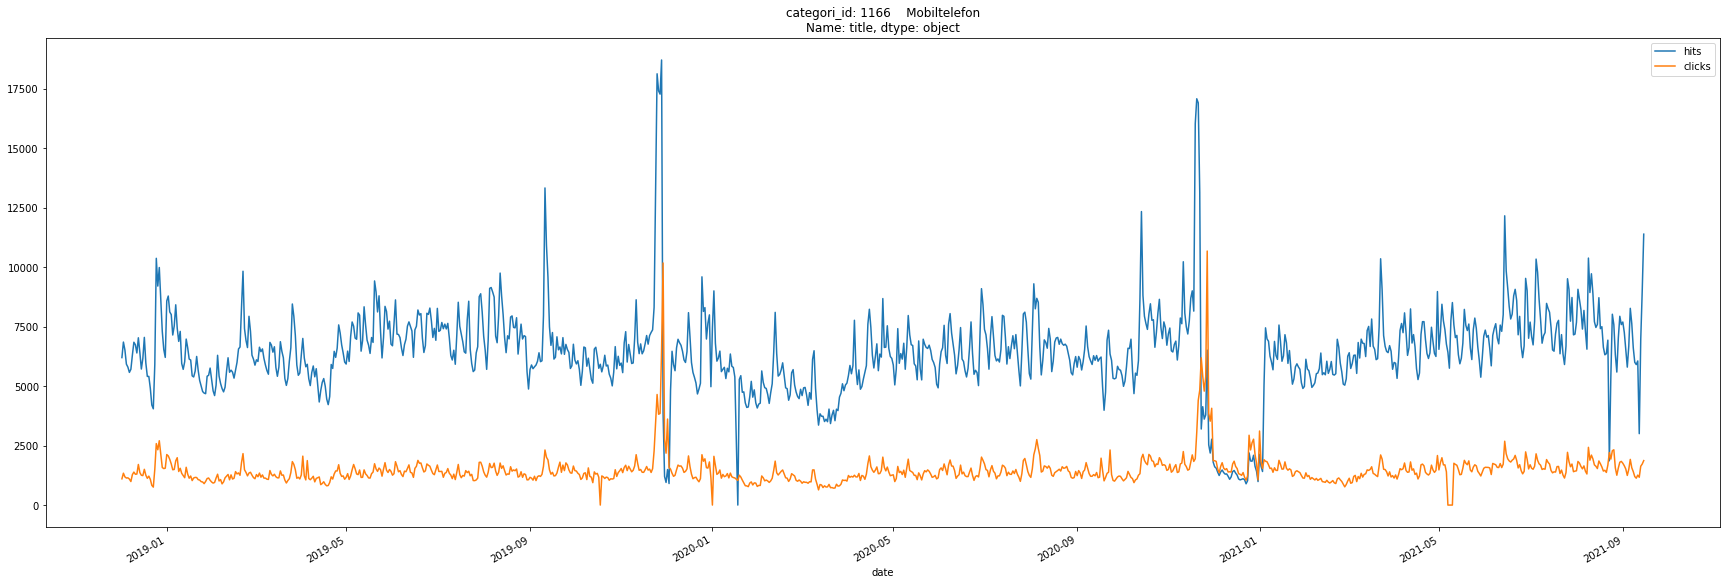

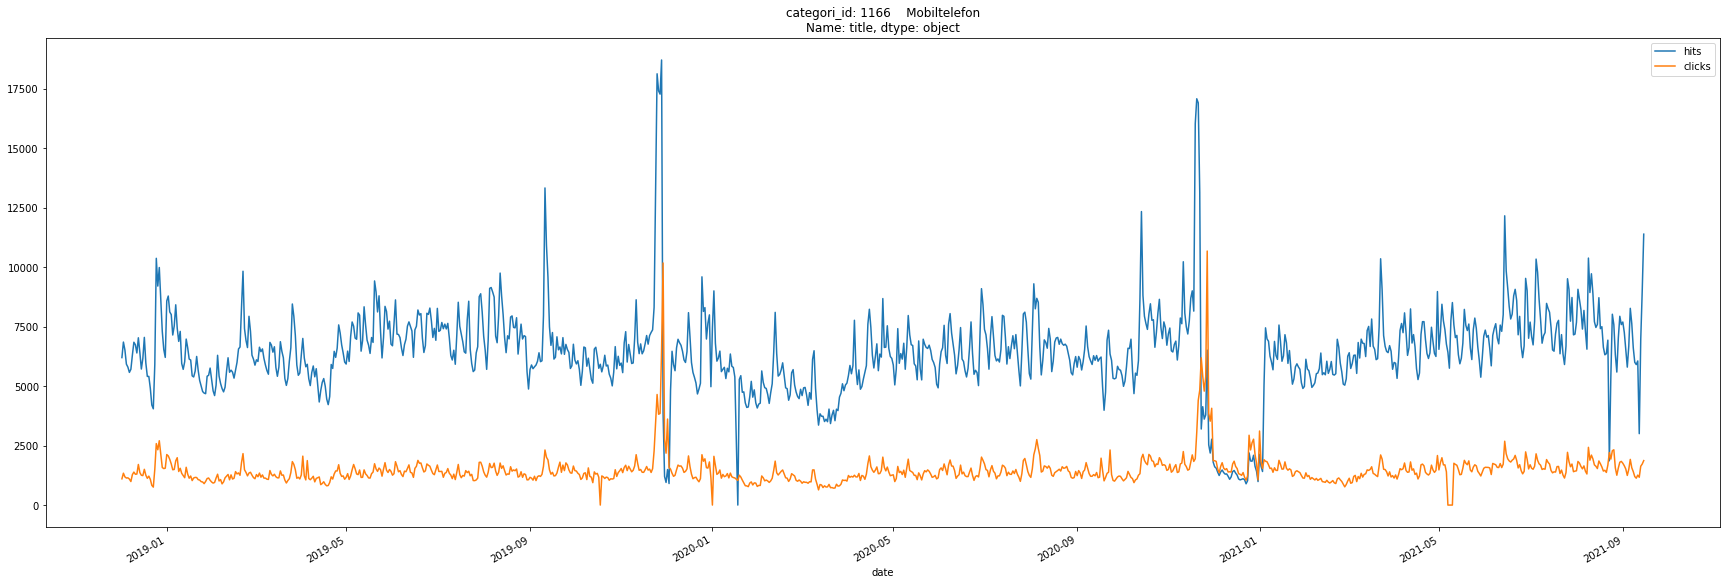

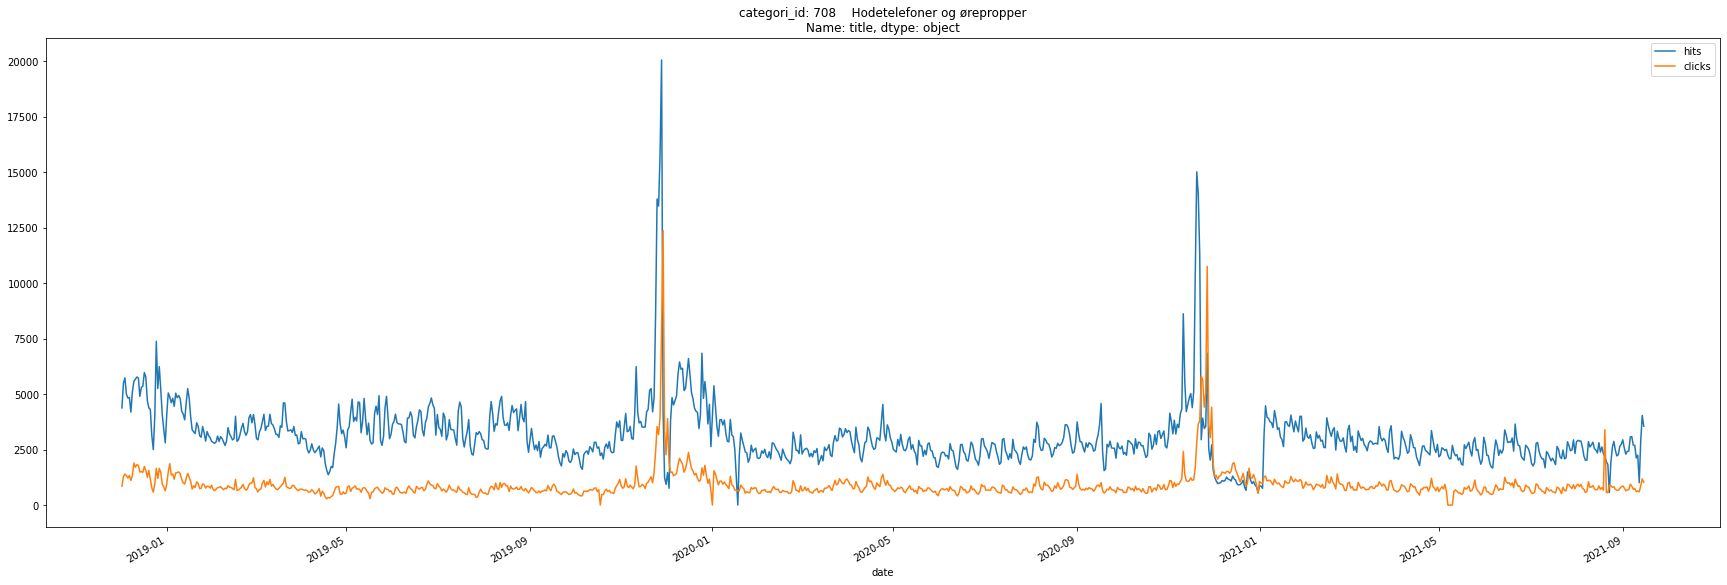

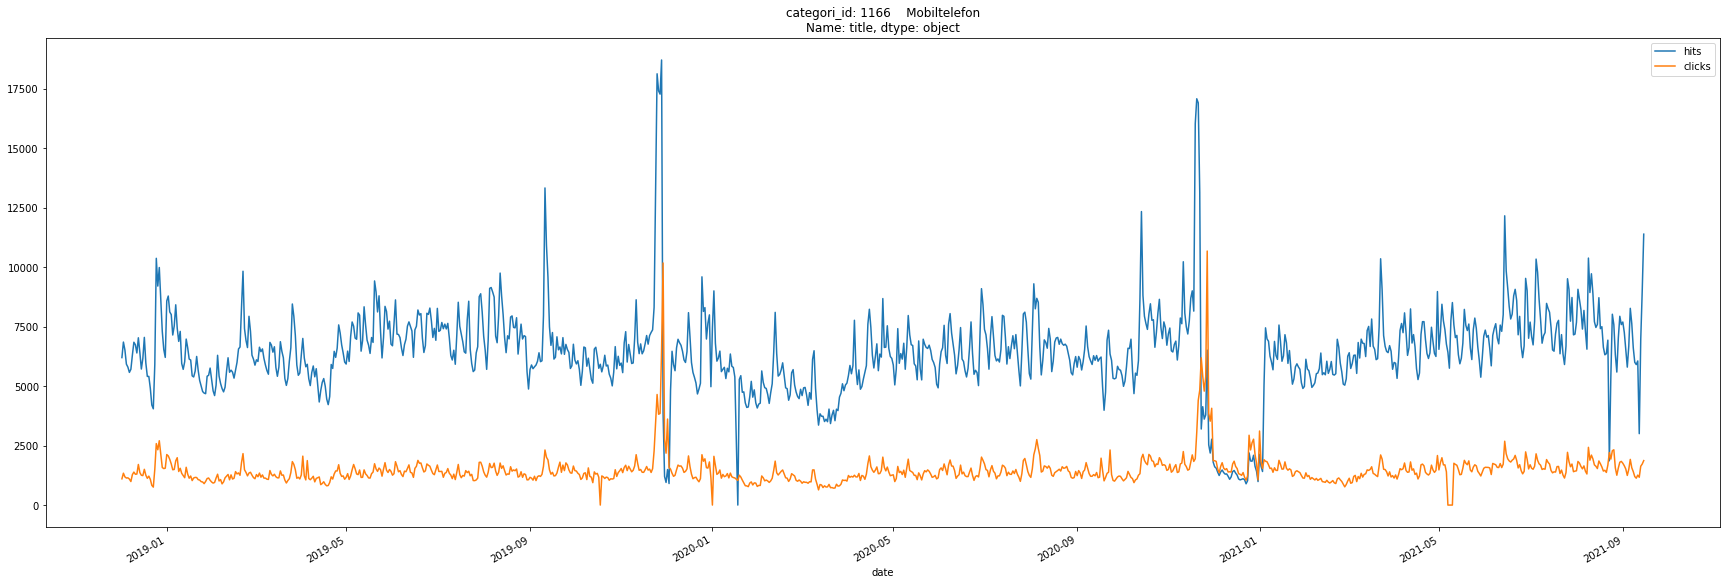

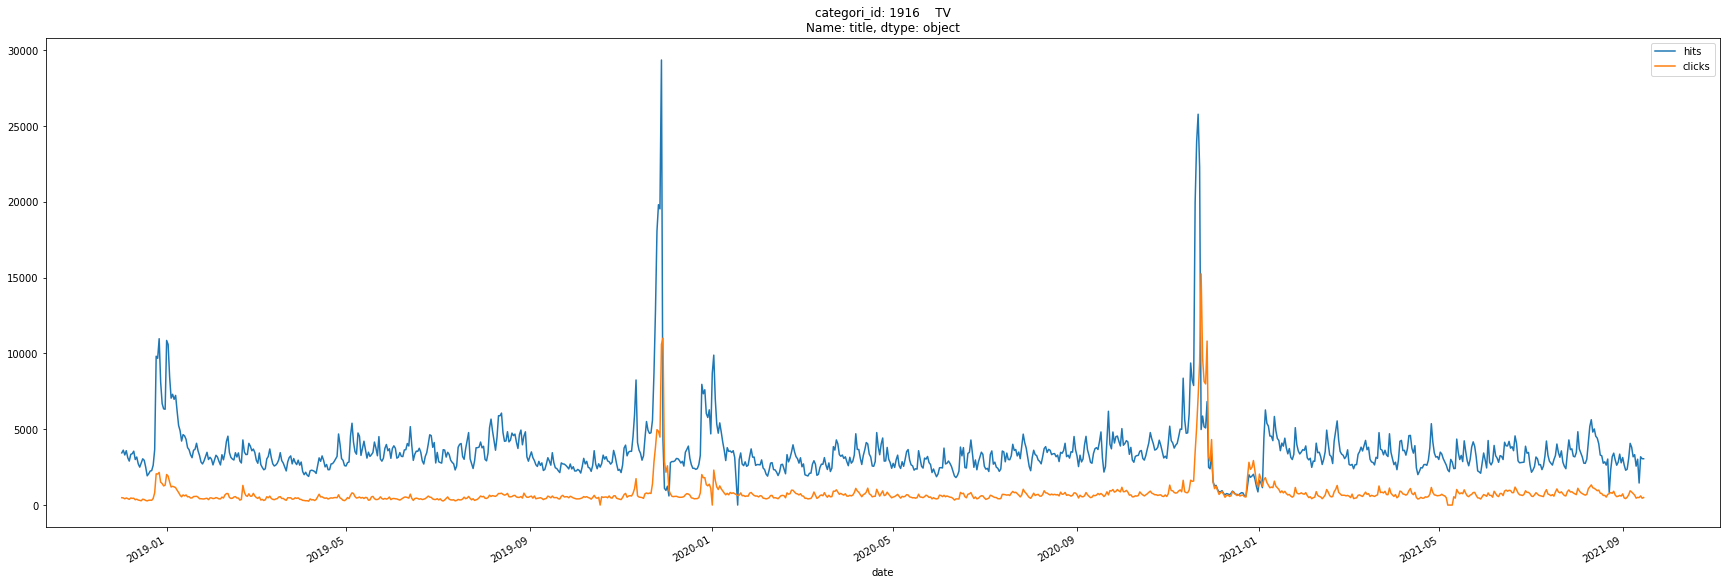

In [9]:
import matplotlib.dates as mdate
date_locator = mdate.MonthLocator()
formatter = mdate.DateFormatter("%Y-%m")
all_categories = data["cat_id"].tolist()
for cat in all_categories[:15]:
    cat_name = categories.loc[categories["internal_doc_id"] == cat]["title"]
    grouped[grouped["cat_id"] == cat].plot(
        x="date", 
        y=["hits", "clicks"], 
        title=f"categori_id: {cat_name}", 
        figsize=(30, 10),
        )#.xaxis.set_major_locator(date_locator)
#grouped.plot(x="date", y=["hits", "clicks"],)
#interesting_data.plot()

<AxesSubplot:title={'center':'categori: Turmat'}, xlabel='date'>

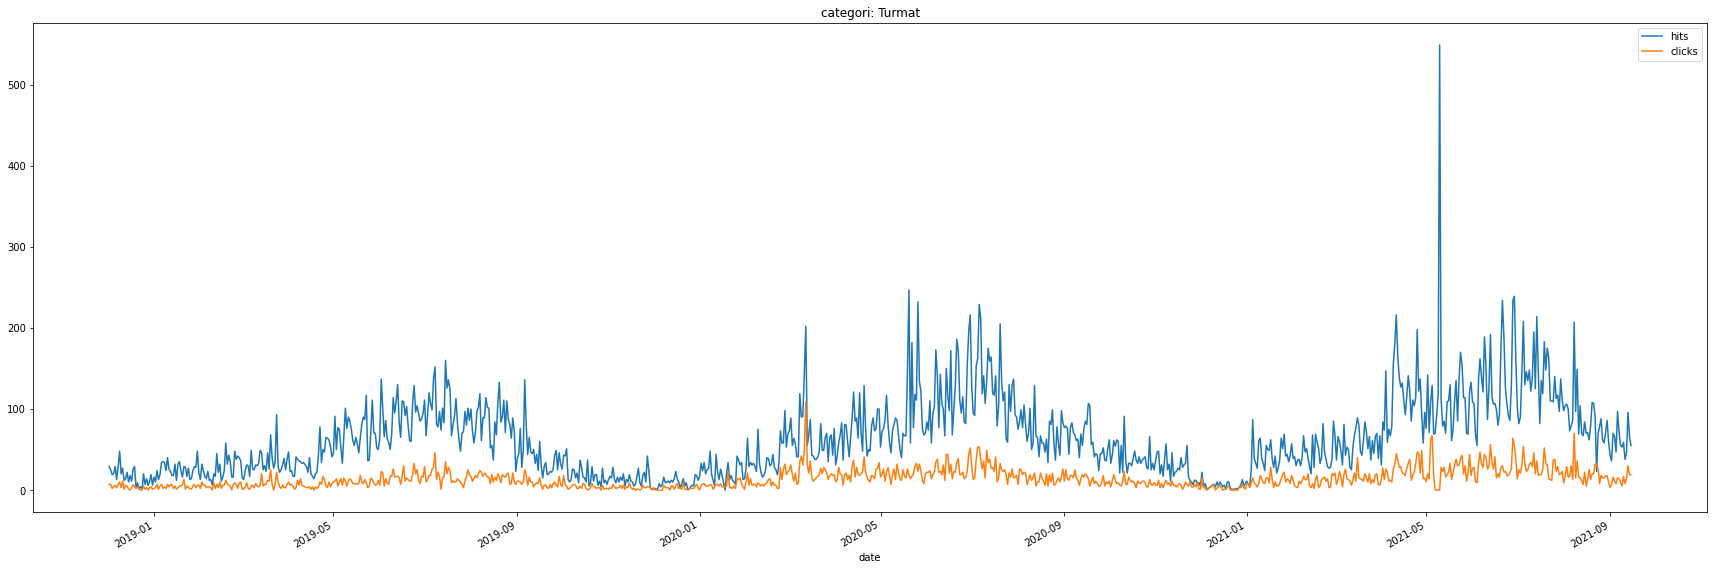

In [10]:
turmat = grouped[grouped["cat_id"] == 11488]
turmat.head()
name = categories.loc[categories["internal_doc_id"] == 11488]
name.head()
turmat.plot(
        x="date", 
        y=["hits", "clicks"], 
        title=f"categori: Turmat", 
        figsize=(30, 10),)

<AxesSubplot:title={'center':'categori: Våpenskap'}, xlabel='date'>

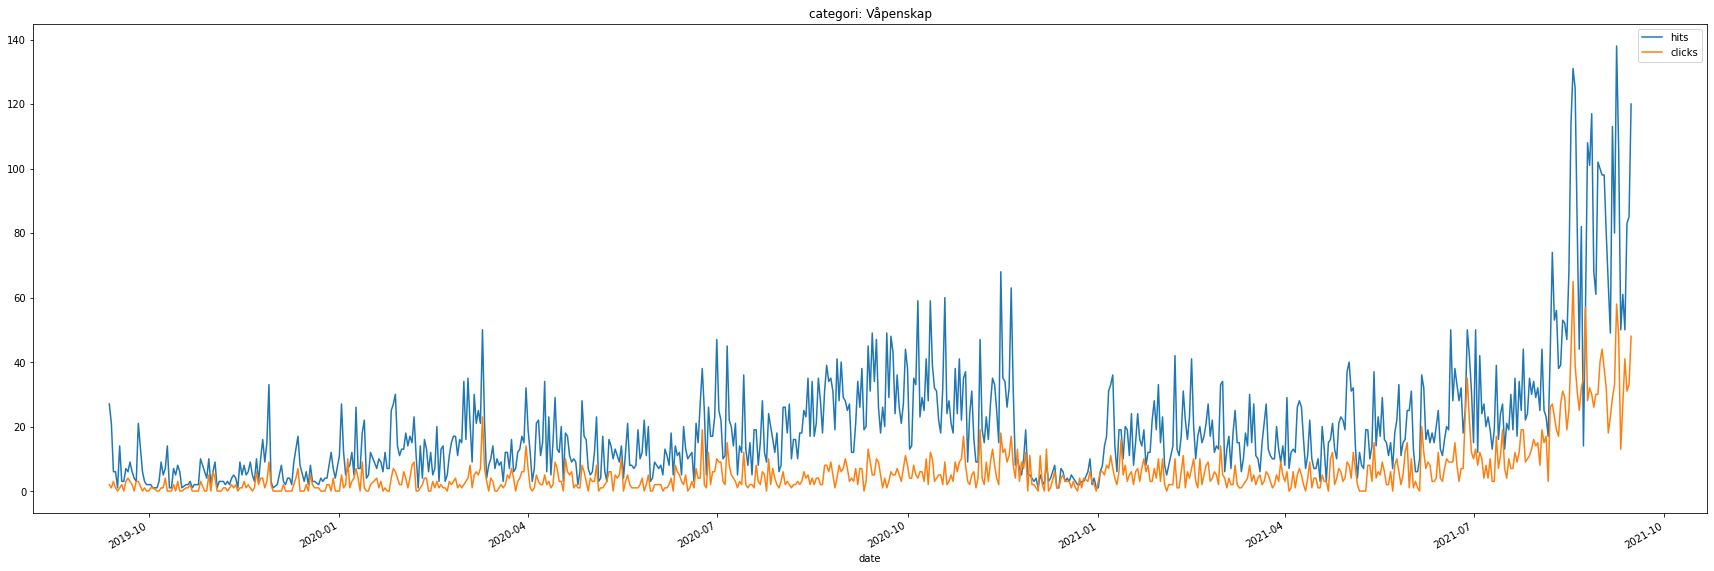

In [15]:
vapenskap = grouped[grouped["cat_id"] == 12738]
vapenskap.head()
name = categories.loc[categories["internal_doc_id"] == 12738]
name.head()
vapenskap.plot(
        x="date", 
        y=["hits", "clicks"], 
        title=f"categori: Våpenskap", 
        figsize=(30, 10),)

<AxesSubplot:title={'center':'categori: Kopp og krus'}, xlabel='date'>

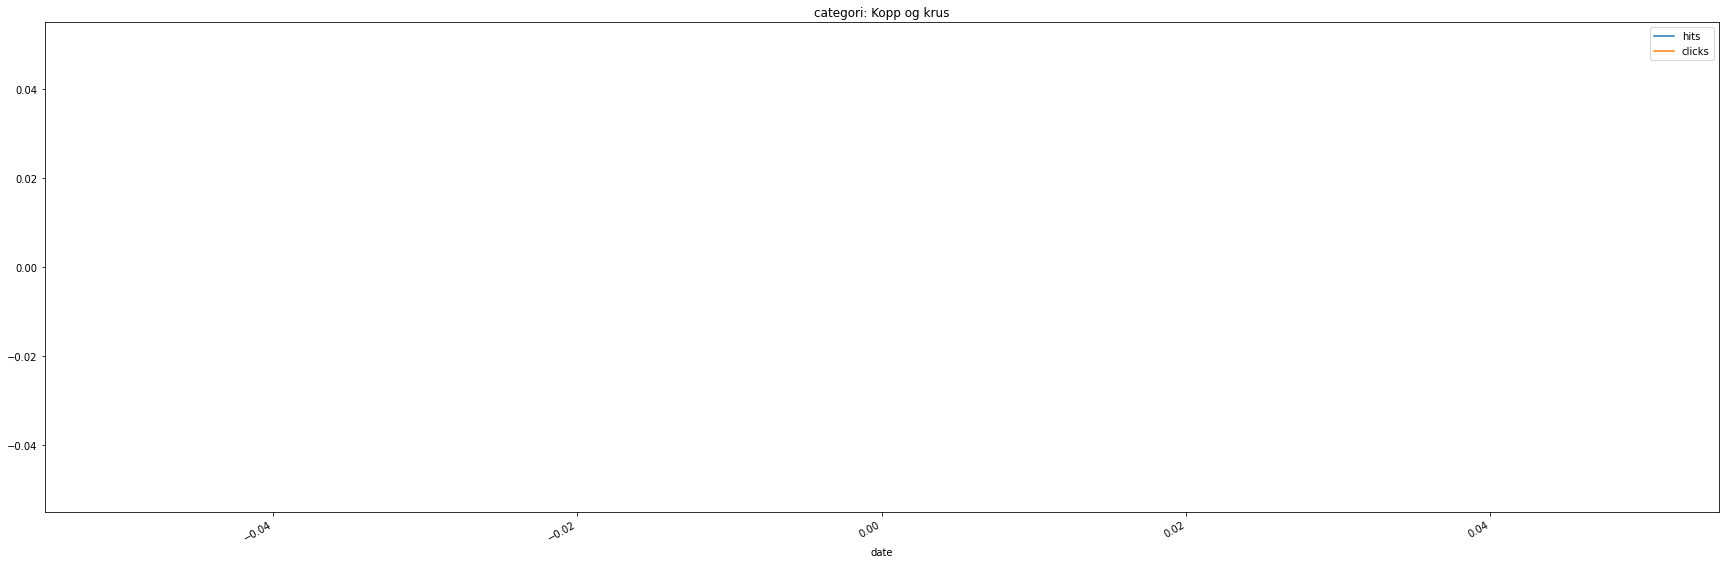

In [16]:
kopp_og_krus = grouped[grouped["cat_id"] == 12663]
kopp_og_krus.head()
name = categories.loc[categories["internal_doc_id"] == 12663]
name.head()
kopp_og_krus.plot(
        x="date", 
        y=["hits", "clicks"], 
        title=f"categori: Kopp og krus", 
        figsize=(30, 10),)

In [ ]:
Det virker ikke som om det er data på kopper og krus. Dette burde undersøkes nærmere. Forhåpentligvis finnes dataen, men den er ikke hentet ut og sendt til oss.

<AxesSubplot:title={'center':'categori: Hengekøye'}, xlabel='date'>

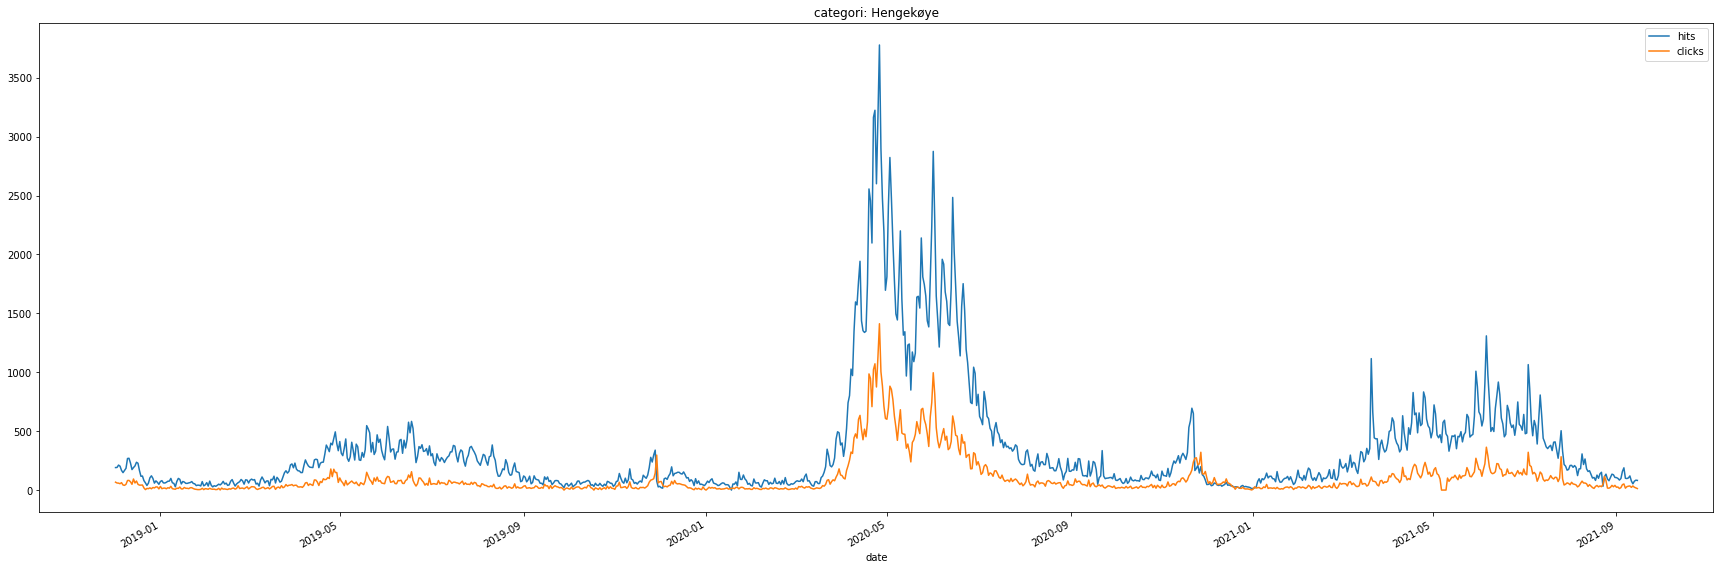

In [18]:
hengekøye = grouped[grouped["cat_id"] == 11514]
hengekøye.head()
name = categories.loc[categories["internal_doc_id"] == 11514]
name.head()
hengekøye.plot(
        x="date", 
        y=["hits", "clicks"], 
        title=f"categori: Hengekøye", 
        figsize=(30, 10),)

<AxesSubplot:title={'center':'categori: Hengekøye'}, xlabel='date'>

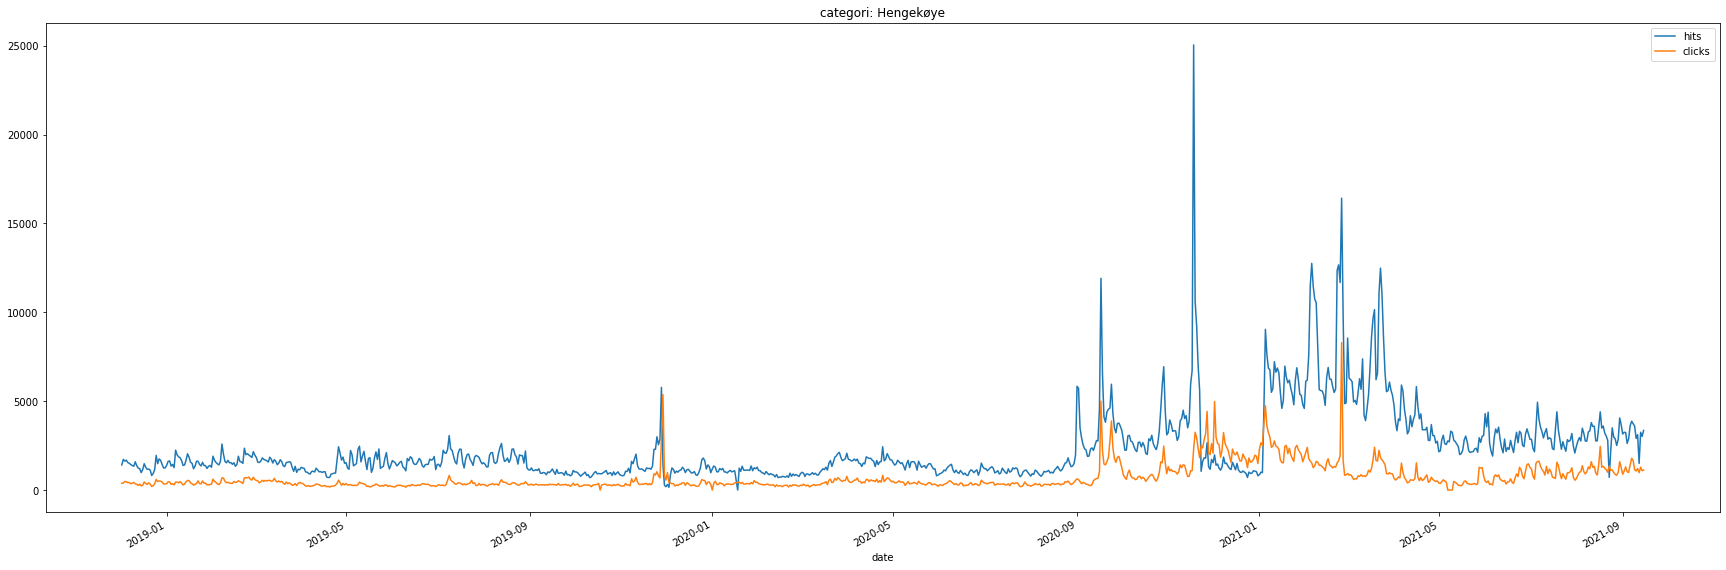

In [19]:
gpu = grouped[grouped["cat_id"] == 30]
gpu.head()
name = categories.loc[categories["internal_doc_id"] == 30]
name.head()
gpu.plot(
        x="date", 
        y=["hits", "clicks"], 
        title=f"categori: Hengekøye", 
        figsize=(30, 10),)

In [ ]:
import numpy as np
name.head()
import seaborn as sns
print(np.corrcoef(data["hits"], data["clicks"]))
correlation_matrix = data[["hits", "clicks"]].corr()
sns.heatmap(correlation_matrix)

Høy korrelasjon mellom hits og klicks!

In [ ]:
data.describe()

In [ ]:
data.info()

In [ ]:
data.hist(figsize=(20,15))

På de to siste grafene ser vi at de aller fleste dagene så har vi 0 clicks og hits.
Noen veldig få dager har vi 1 click / hit og enda færre dager har vi flere.